In [4]:
import sys

# laptop
sys.path.append( '/home/greg/current/NMEG_utils/py_modules/' )
af_path = '/home/greg/sftp/eddyflux/Ameriflux_files/provisional/'
fig_path = 'figures/multiyear_figs/'
# UNM desktop
#sys.path.append( '..\\NMEG_utils\\py_modules\\' )
#af_path = 'C:\\Research_Flux_Towers\\Ameriflux_files\\'
#fig_path = 'figures\\multiyear_figs\\'

import load_nmeg as ld
import transform_nmeg as tr
import plot_nmeg as nmegplt
import pandas as pd
import seaborn as sns
#import ipdb as ipdb

%matplotlib inline
sns.set_style("white")


In [5]:
# Years to load
start = 2007
end = 2014
# Sites to load (pulls list of AF sites from plot_nmeg module)
sites = ['Seg', 'Ses', 'Sen']

# Fill a dict with multiyear dataframes for each site in sites
hourly = { x : 
          ld.get_multiyr_aflx( 'US-' + x, af_path, gapfilled=True, startyear=start, endyear=end) 
          for x in sites }

Parsing /home/greg/sftp/eddyflux/Ameriflux_files/provisional/US-Seg_2007_gapfilled.txt
Parsing /home/greg/sftp/eddyflux/Ameriflux_files/provisional/US-Seg_2008_gapfilled.txt
Parsing /home/greg/sftp/eddyflux/Ameriflux_files/provisional/US-Seg_2009_gapfilled.txt
Parsing /home/greg/sftp/eddyflux/Ameriflux_files/provisional/US-Seg_2010_gapfilled.txt
Parsing /home/greg/sftp/eddyflux/Ameriflux_files/provisional/US-Seg_2011_gapfilled.txt
Parsing /home/greg/sftp/eddyflux/Ameriflux_files/provisional/US-Seg_2012_gapfilled.txt
Parsing /home/greg/sftp/eddyflux/Ameriflux_files/provisional/US-Seg_2013_gapfilled.txt
Parsing /home/greg/sftp/eddyflux/Ameriflux_files/provisional/US-Seg_2014_gapfilled.txt
Parsing /home/greg/sftp/eddyflux/Ameriflux_files/provisional/US-Ses_2007_gapfilled.txt
Parsing /home/greg/sftp/eddyflux/Ameriflux_files/provisional/US-Ses_2008_gapfilled.txt
Parsing /home/greg/sftp/eddyflux/Ameriflux_files/provisional/US-Ses_2009_gapfilled.txt
Parsing /home/greg/sftp/eddyflux/Ameriflux_

## Examine 30min Ameriflux files

In [6]:
# Resample all 30min dataframes in Hourly to daily and add to daily dict
daily = { x : 
         tr.resample_30min_aflx( hourly[x], freq='1D', 
                                c_fluxes=[ 'GPP', 'RECO', 'FC_F' ], 
                                le_flux=[ 'LE_F' ], 
                                avg_cols=[ 'TA_F', 'RH_F', 'SW_IN_F', 'RNET', 'VPD_F' ], 
                                sum_cols=[ 'P_F' ] , tair_col='TA_F' ) 
         for x in hourly.keys() }

# Convert this to a pandas panel
d = pd.Panel(daily)

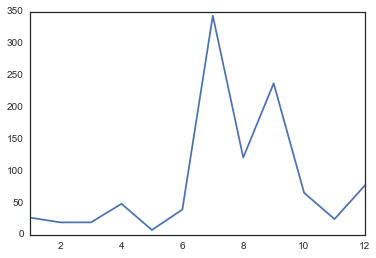

In [7]:
# Grouped by month (sums) looks ok
gby = d.Sen.P_F.groupby(d.Sen.index.month)
gby.sum().plot()

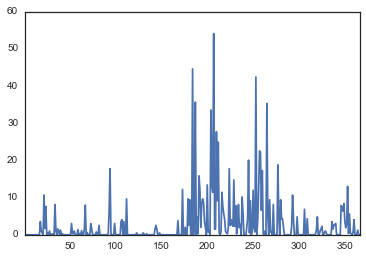

In [8]:
# Day of year sums look ok too
gby = d.Sen.P_F.groupby(d.Sen.index.dayofyear)
gby.sum().plot()

## Examine daily Ameriflux files

In [9]:
# Fill a dict with multiyear dataframes for each site in sites
af_daily = { x : 
            ld.load_daily_aflx_file( af_path + 'Daily/' + 'US-' + x + '_2007_2015_daily.txt' ) 
            for x in sites }

Parsing /home/greg/sftp/eddyflux/Ameriflux_files/provisional/Daily/US-Seg_2007_2015_daily.txt
Parsing /home/greg/sftp/eddyflux/Ameriflux_files/provisional/Daily/US-Ses_2007_2015_daily.txt
Parsing /home/greg/sftp/eddyflux/Ameriflux_files/provisional/Daily/US-Sen_2007_2015_daily.txt


In [24]:
# Check to make sure file is loading ok
af_daily['Seg'].head()

,P_F,USTAR,WS,PA,CO2,VPD_F,H2O,TA_F,RH_F,TA_F_min,...,GPP,RECO,RNET,PAR,SW_IN_F,SW_OUT,LW_IN,LW_OUT,LE_F,H_F
2007-01-01,0.614,0.148717,1.298060,84.445747,369.15769,0.119559,8.014491,-7.735415,88.503099,-13.85,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-01-02,1.024,0.101905,1.560251,84.565646,378.34410,0.056909,5.492217,-5.979583,86.450354,-9.67,...,0.008860,0.695148,NaN,NaN,11067328,NaN,NaN,NaN,761582.21,518772.76
2007-01-03,0.000,0.109742,1.575323,84.335021,388.97963,0.047556,7.011776,-7.667729,87.930917,-12.26,...,0.001474,0.566223,NaN,NaN,12514748,NaN,NaN,NaN,834624.25,893793.51
2007-01-04,0.000,0.098083,1.593425,83.804750,380.32087,0.182204,6.087125,-1.980417,72.645750,-11.00,...,0.103238,0.451032,NaN,NaN,12955961,NaN,NaN,NaN,1392311.70,137701.80
2007-01-05,1.024,0.304280,3.477538,83.476438,373.89558,0.318452,6.649489,3.524167,63.122687,-2.04,...,0.150757,0.204165,NaN,29341639,12988635,NaN,NaN,NaN,2494522.20,-570830.65


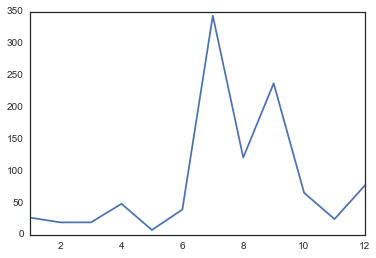

In [54]:
# Grouped by month looks ok
d_af = pd.Panel(af_daily)
gby = d_af.Sen.P_F.groupby(d_af.Sen.index.month)
gby.sum().plot()

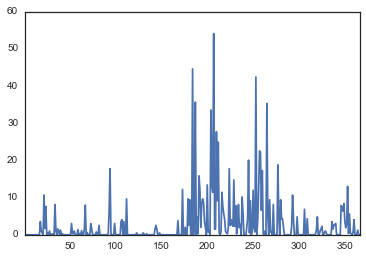

In [55]:
# Grouped by day of year looks OK
gby = d_af.Sen.P_F.groupby(d_af.Sen.index.dayofyear)
gby.sum().plot()